### Physics 112: Spring 2021: Section 1: Professor Holzapfel 
### HW7 computational problem 1
### One Dimensional Debeye Model
Copyright 2021 by the Regents of the University of California. All rights reserved.

In [22]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy.optimize import curve_fit
import scipy.integrate as integrate



In this exercise, we are going to explore the Debeye model in one dimension. In particular, we will calculate the internal energy $U(\tau)$ and the Heat Capacity $C_V(\tau)=\frac{dU}{d\tau}$ as a function of temperature. We will also explore the range of applicability of the assumptions that the the sum over states can be treated as an integral and that low frequency modes involving many particles produce the observed heat capacity at low temperatures missing in the Einstein model.

We assume that the $N$ atoms in our system are arranged in a line of length $L$, with spacing between atoms of $a$. Waves travel in the line of atoms at a speed $c_s$. The system is in thermal equilibrium with a reservoir of temperature $\tau$. As it is a 1D system, there is only one longitudinal polarization.

The energy of this system is the phonon energy times the phonon occupation number summed over N total modes for the system $$U(\tau) = \sum_{n=1}^N \frac{\hbar \omega_n}{\exp\left(\frac{\hbar \omega_n}{\tau}\right) -1}$$
where $\hbar \omega_n=\frac{n\pi \hbar c_s}{L} = \frac{n\tau_D}{N}$ and $\tau_D = \frac{\hbar c_s \pi}{a}$.

In the limit where the phonon energy quanta are small compared to the thermal energy, $\hbar \omega < \tau$, we can express this sum as an integral
$$U(\tau) = \int_0^{\omega_D} \frac{L}{\pi c_s}\frac{\hbar \omega_n}{\exp\left(\frac{\hbar \omega_n}{\tau}\right) -1} d\omega$$
where $\omega_D = \frac{\pi c_s}{a}$. 
In Lecture, we calculated an approximate result for the (three dimensional) heat capacity valid for low temperatures. We did this by taking $\omega_D = \infty$, performing the definite integral and then differentiating the result with respect to $\tau$. This is fine for the low temperature limit of the heat capacity, but will not yield valid results over the whole temperature range. To do this correctly, we need to differentiate the expression for $U(\tau)$ before summing or integrating over modes.

Doing this, we can express the heat capacity as a sum over modes
$$C_v = \frac{dU}{d\tau} = \sum_{n=1}^N \left(\frac{n\tau_D}{N\tau}\right)^2 \frac{\exp\left(\frac{n\tau_D}{N\tau}\right)}{\left[\exp\left(\frac{n\tau_D}{N\tau}\right) -1\right]^2},$$ or as an approximate integral
$$C_v = N \left(\frac{\tau}{\tau_D}\right) \int_0^{\frac{\tau}{\tau_D}} \frac{x^2 e^x}{(e^x-1)^2} dx.$$
Although it will not be part of your homework submission, you should work through this problem to make sure that you can reproduce these results. Although we are specifically working with a 1D system in this problem, the calculation for the heat capacity for the 3D Debeye model proceeds similarly.

a) Numerically integrate the integral expressions for the energy and heat capacity to find $U(\tau)$ and $C_v(\tau)$. Plot $\frac{U(\tau)}{N\tau}$ and $\frac{C_v(\tau)}{N}$ as a function of temperature over the range  $0.01 < \frac{\tau}{\tau_D} < 10$ in steps of $0.01$. Do the maximum values of these functions agree with your expectations from equipartition? 

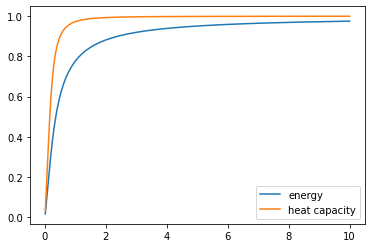

In [23]:
#a) Solution here
def C_V(tau, tau_D, N):
  # this is the continuous approximation.
  f = lambda x: np.power(x,2) * np.exp(x) / np.power(np.exp(x)-1,2)
  answer = N * (tau/tau_D) * integrate.quad(lambda x: f(x), 0, tau_D/tau)[0]
  return answer

def C_V_DISCRETE(tau, tau_D, N):
  # this is the discrete, exact sum. 
  # More accurate than the continuous approximation as defined previously. 
  # a = [1,2,3,4,5]
  # print(np.sum(a))
  # return np.sum(a) 
  X = lambda n: (n * tau_D) / (N * tau) #helper function
  def f(n):
    X_n = X(n)
    expXn = np.exp(X_n)
    return np.power(X_n,2) * expXn / np.power(expXn-1,2)

  rg = np.arange(1,N+1) # range. Note that the last element(N+1)is NOT included. 
  return np.sum([f(n)for n in rg])

def U(tau, tau_D, N):
  f = lambda x: x / (np.exp(x)-1)
  answer = N * tau * (tau/tau_D) * integrate.quad(lambda x: f(x), 0, tau_D/tau)[0]
  return answer


class debye_system_1D():
  def __init__(self, a=1/np.power(10,34), v=10/np.power(10,34), N=50000, tau_over_tau_D=1, Cv = C_V, u = U):
    self.a = a
    self.v = v
    self.N = N
    self.hbar = 6.62607004 * pow(10, -34) / (2 * math.pi)
    self.tau_D = math.pi * self.hbar * self.v / self.a
    self.tau = self.tau_D * tau_over_tau_D
    self.L = self.N * self.a
    self.C_V = Cv(self.tau, self.tau_D, self.N)
    self.U = u(self.tau, self.tau_D, self.N)
    self.normalized_C = self.C_V / self.N
    self.normalized_U = self.U / (self.N * self.tau)

def part_a():
  stepSize = 0.01
  x = np.linspace(0.01, 10, int((10-0.01)/stepSize))  #tau/tauD
  systems = [debye_system_1D(tau_over_tau_D=item) for item in x]
  energies,heatCaps = [system.normalized_U for system in systems],[system.normalized_C for system in systems]
  
  plt.plot(x, energies, label = 'energy')
  plt.plot(x, heatCaps, label='heat capacity')
  plt.legend(loc="lower right")
  return {
      'x': x,
      'energies': energies,
      'heatCaps': heatCaps,
      'systems': systems,
      'systemClass': debye_system_1D
  }


part_a_data = part_a()


# ===============================
#   at high enough temperatures, both energy and heat capacities 
#  approaches a maximum value of 1. The value 1 equals 1/2 + 1/2, which
#   corresponds to a contribution of 1/2 from both the position and momentum
#   according to equipartition theorem, since both of these coordinates 
#  is of degree 2 in the hamiltonian. 
# 
# ===============================



b) To get a better look at the low temperature values, reproduce your plot from part a) on a log-log scale.  At approximately what values of $\frac{\tau}{\tau_D}$ do $\frac{U(\tau)}{N\tau}$ and $\frac{C_V(\tau)}{N}$ reach 50% and 90% of their maximum values? 

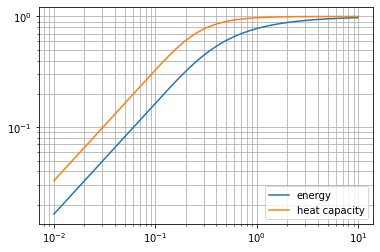

In [24]:
#b) Solution here
def part_b():
  x = part_a_data['x']
  y_U = part_a_data['energies']
  y_C = part_a_data['heatCaps']

  plt.loglog(x, y_U, label='energy')
  plt.loglog(x, y_C, label = 'heat capacity')
  plt.grid(True, which="both", ls="-")
  plt.legend(loc="lower right")
part_b()

# the values at which U/Ntau and C/N reach 50% and 90% 
# seen from the figure. 


c) In the 3D Debeye model, the heat capacity at low temperature scales as $\tau^3$. Fit to the functions for $U(\tau)$ and $C_v(\tau)$ over the low temperature region $0.01 > \frac{\tau}{\tau_D} < 0.1$ to power laws $U \propto \tau^{\alpha}$ and $C_v \propto \tau^\beta$ to determine $\alpha$ and $\beta$ for the low temperature scaling of the 1D energy and heat capacity with temperature. How do these results compare with your expectations based on the 3D results? Recreate your plot from part b) with these best fit power laws for $C_v/N$ and $U/N\tau$ overplotted.

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


FITTING RESULT AT LOW TEMPERATURES:
 U goes like tau ^ 2.0
C goes like tau ^ 0.9986026566986296


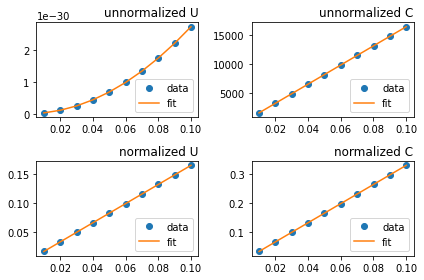

In [25]:
#c) Solution here
def part_c():
  def f(x, a, b):
    return a * np.power(x, b)
  systems = part_a_data['systems'][:10]
  x = part_a_data['x'][:10]
  y_U = [system.U for system in systems]  #unnormalized energies
  y_C = [system.C_V for system in systems]  #unnormalized heat capacities

  normal_y_U = [system.normalized_U for system in systems]
  normal_y_C = [system.normalized_C for system in systems] 

  fitting_params = {
      "U": curve_fit(f, x, y_U, p0=(0,2))[0],
      "C": curve_fit(f, x, y_C, p0=(1,1))[0]
  }
  
  def generate_best_fit_data():
    U = [f(item, *fitting_params["U"]) for item in x]
    C = [f(item, *fitting_params["C"]) for item in x]
    normal_U = [u/(systems[U.index(u)].N * systems[U.index(u)].tau)for u in U]
    normal_C = [c/(systems[C.index(c)].N)for c in C]

    return {
        'U':U,
        'C':C,
        "normal_U": normal_U,
        "normal_C": normal_C
    }
  
  best_fit_curves = generate_best_fit_data()

  #-------report fitting result --------
  print("FITTING RESULT AT LOW TEMPERATURES:")
  print(
      f' U goes like tau ^ {fitting_params["U"][1]}'
  )
  print(
      f'C goes like tau ^ {fitting_params["C"][1]}'
  )

  #----plotting fitted curves and original curves ------
  plt.subplot(2, 2, 1)
  plt.plot(x, y_U, 'o', label='data')    #unnormalized U
  plt.plot(x, best_fit_curves['U'],label='fit')
  plt.legend(loc="lower right")
  plt.title('unnormalized U', loc='right')

  plt.subplot(2, 2, 2)
  plt.plot(x, y_C, 'o', label='data')    #unnormalized C
  plt.plot(x, best_fit_curves['C'],label='fit')
  plt.legend(loc="lower right")
  plt.title('unnormalized C',loc='right')

  plt.subplot(2, 2, 3)
  plt.plot(x, normal_y_U, 'o',label='data') #normalized U
  plt.plot(x, best_fit_curves['normal_U'],label='fit')
  plt.legend(loc="lower right")
  plt.title('normalized U',loc='right')

  plt.subplot(2, 2, 4)
  plt.plot(x, normal_y_C, 'o',label='data') #normalized C
  plt.plot(x, best_fit_curves['normal_C'],label='fit')
  plt.legend(loc="lower right")
  plt.title('normalized C',loc='right')
  plt.tight_layout()


part_c()


# ===============================
#  at low temperatures heat capacity scales like tau to the 1st power. 
#  this is expected because this is a 1-dimensional system; 
# if it was 3D then the heat capacity would scale like tau to the 3rd power.
# 

In [26]:
#d) Solution here
def part_d_computation(N):
  # returns two lists of systems, 
  # one has heat capacity computed as the discrete sum 
  # and the other is the continuous approximation
  Cv = C_V_DISCRETE
  system = part_a_data['systemClass']
  
  stepSize = .01
  x = np.linspace(0.01, 10, int((10-0.01)/stepSize))  #tau/tauD
  systems = [system(tau_over_tau_D=item, Cv=Cv, N=N) for item in x]
  systems_approx = [system(tau_over_tau_D=item, N=N) for item in x]
  return {
      'systems': systems,
      'systems_approximated': systems_approx,
      'x': x
  }

In [27]:
part_d_data = {
    'N=1000':part_d_computation(1000),
    'N=10': part_d_computation(10)
}

# runtime ~ 30s

d) Now return to the expression you wrote for heat capacity $\frac{C_V}{N}$ in terms of a sum over modes. Instead of treating the sum as an integral, evaluate the sum exactly. In turning the sum into an integral we assumed that there are many modes with phonon energy less than the thermal energy. This will break down in the limit of small N and low temperature and this exact sum will be more accurate.  For N=1000, plot the value of $\frac{C_V}{N}$ from the sum as a function of temperature over the range $0.01 < \frac{\tau}{\tau_D} < 10$ in steps of $\sim 0.01$. Plot your result on a log-log scale. Compare your result with the integral approximation by plotting overplotting the integral result for $\frac{C_V}{N}$ on top of your result for the sum with $N=1000$. What does your plot tell you about the accuracy of the continuum appoximation for $N=1000$ particles over this temperature range? Repeat this plot for $N=10$ and comment on the differences.

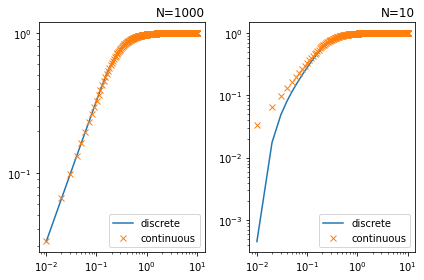

In [28]:
def part_d():
  # plt.loglog(x, heatCaps)
  # plt.loglog(x, heatCaps_approx,'o')

  # heatCaps = [system.normalized_C for system in systems]
  # heatCaps_approx = [system.normalized_C for system in systems_approx]
  L1, L2 = part_d_data['N=1000'], part_d_data['N=10']
  N1, N2 = L1['systems'][0].N, L2['systems'][0].N


  # -----------plotting N = 1000 -----------
  plt.subplot(1, 2, 1)
  plt.loglog(
      L1['x'],
      [system.normalized_C for system in L1['systems']],
      label='discrete'
  )
  plt.loglog(
      L1['x'],
      [system.normalized_C for system in L1['systems_approximated']],
      'x',
      label='continuous'
  )
  plt.legend(loc="lower right")
  plt.title(f'N={N1}',loc='right')

  # -----------plotting N = 10-----------
  plt.subplot(1, 2, 2)
  plt.loglog(
      L2['x'],
      [system.normalized_C for system in L2['systems']],
      label='discrete'
  )
  plt.loglog(
      L2['x'],
      [system.normalized_C for system in L2['systems_approximated']],
      'x',
      label='continuous'
  )
  plt.legend(loc="lower right")
  plt.title(f'N={N2}',loc='right')
  plt.tight_layout()



part_d()


# ===============================
# for N = 1000 the continuum approximation is pretty good. 
#  It hugs the discrete sum pretty closely all the way 
# down to tau/tauD = 0.01. 
#  For N = 10, the continuum approximation breaks down at 
#  somewhere between 10^-1 and 10^0. 
#  


In [29]:
#e) Solution here
# systems = [system(tau_over_tau_D=item, Cv=Cv, N=N) for item in x]

def part_e_computation(N):
  Cv = C_V_DISCRETE
  system = part_a_data['systemClass']
  
  def ratio(tau_over_tau_D, N):
    s = system(tau_over_tau_D = tau_over_tau_D, Cv=Cv, N=N)
    s_ref = system(tau_over_tau_D = tau_over_tau_D, Cv=Cv, N=1000)
    return s.normalized_C / s_ref.normalized_C
  
  stepSize = .01
  x = np.linspace(0.01, 10, int((10-0.01)/stepSize))  #tau/tauD
  y = [ratio(item, N) for item in x]
  
  return {
      'x':x,
      'y': y
  }


In [30]:
# N_list = [1,3,10,1000]
part_e_data = {
    "N=1":part_e_computation(1),
    "N=3":part_e_computation(3),
    "N=10":part_e_computation(10),
    "N=1000":part_e_computation(1000)
}
# runtime ~ 80s

e) Find the ratio of $\frac{C_V(N)}{N}$ (for $N=1,3,10,100$) to $\frac{C_V(N)}{N}$ (for $N=1000$) as a function of $\tau$. In this case, we are using the result for $N=1000$ as a reference where N is large enough that the particle number should not matter. Plot the heat capacity ratio as function of temperature for each of the values N=1,3,10,100.  Overplot the results on a log-log plot as a function of temperature over the range $0.01 < \frac{\tau}{\tau_D} < 10$ in steps of $\sim 0.01$. Where do these ratios differ significantly from 1? 

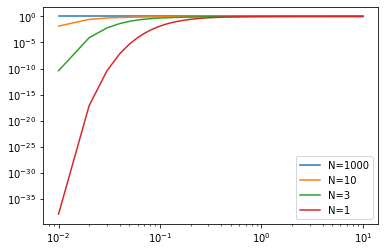

In [34]:
def part_e():
  x = part_e_data['N=1']['x'] # the four N's all use the same x
  plt.loglog(x,  part_e_data['N=1000']['y'],label='N=1000')
  plt.loglog(x,  part_e_data['N=10']['y'],label='N=10')
  plt.loglog(x,  part_e_data['N=3']['y'],label='N=3')
  plt.loglog(x,  part_e_data['N=1']['y'],label='N=1')
  plt.legend(loc="lower right")
part_e()

# ===============================
#  The N=1 plot breaks really badly since at low temperatures, 
#  the ratio is really small, almost 0. 
#  The N=10 and N=3 plots starts breaking when the x axis is ~ 0.1

f) Finally, we want to look in detail at the summation solution in low temperature regime where we fix $\frac{\tau}{\tau_D} = 0.1$. Calculate the ratio of the heat capacity per particle for N particles $\frac{C_V(N)}{N}$ over $\frac{C_V(N)}{N}$ (for $N=1000$). In this case, we are choosing the result for $N=1000$  as a reference where the particle number is large enough to have no effect. Plot the ratio of the heat capacity as a function of N on a log-log plot over the range $N =1$ to $100$. Why does heat capacity depend on the number of particles in the system? Why is heat capacity in the low temperature regime particularly sensitive to N? Explain your results in terms of our original motivation for the Debeye model over the Einstein solid model.

In [32]:

def part_f_computation():
  system = part_a_data['systemClass']
  tau_over_tau_D = 0.1
  s_ref = system(tau_over_tau_D = tau_over_tau_D, Cv=C_V_DISCRETE, N=1000)
  def ratio(tau_over_tau_D, N, s_ref):
    s = system(tau_over_tau_D = tau_over_tau_D, Cv=C_V_DISCRETE, N=N)
    return s.normalized_C / s_ref.normalized_C
  rang = range(1,100)
  y = [ratio(tau_over_tau_D,N,s_ref) for N in rang]
  return {
      'x': rang,
      'y': y
  }

part_f_data = part_f_computation()

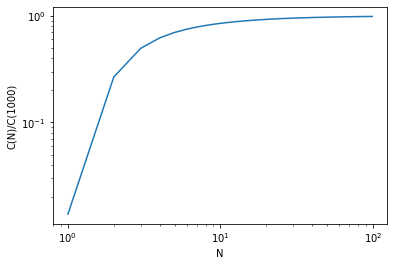

In [33]:
#f) Solution here
def part_f():
  x,y = part_f_data['x'], part_f_data['y']
  plt.loglog(x, y)
  plt.xlabel('N')
  plt.ylabel('C(N)/C(1000)')
part_f()

# ===============================
# Heat capacity relates the amount of heat input to the 
# amount of energy change of the system. How much energy
#  the system has depends on the amount of particles. 
#  Therefore it's no surprise that heat capacity has 
#  to also depend on the number of particles. 
# The Einstein model of solid treats a crystaline solid 
#  as decoupled(indepedent) oscillators, while the 
#  Debye model treats it as coupled oscillators and 
#  analyzes the system as a superposition of 
#  normal modes. The Einstein model, at low temperatures,
#  predicts an exponential decay of heat capacity, which 
#  is in disagreement with experiment. The debye model
#  correctly predicts the T^3 behavior of heat capacity
#  at low temperature. 
